# Visualize seed permutation

In [47]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from config import PIPELINE_RUN_DIR, AMIMS, NETWORKS, SEED_SETS
from functions import split_module_id

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
summary_path = os.path.join(PIPELINE_RUN_DIR, "main/results/mqc_summaries/seed_permutation_mqc.tsv")

In [49]:
amim_meta_df = pd.DataFrame.from_dict(AMIMS)
network_meta_df = pd.DataFrame.from_dict(NETWORKS)
seed_meta_df = pd.DataFrame.from_dict(SEED_SETS)

# Drop "no_tool" from the amim meta df
amim_meta_df = amim_meta_df[amim_meta_df.id != "no_tool"]


summary_df = pd.read_csv(summary_path, sep="\t")
summary_df[["seed_id","network_id","amim_id"]] = summary_df.id.apply(split_module_id)
summary_df["network"] = summary_df["network_id"].replace(dict(zip(network_meta_df.id, network_meta_df.label)))
summary_df["amim"] = summary_df["amim_id"].replace(dict(zip(amim_meta_df.id, amim_meta_df.label)))


## Robustness

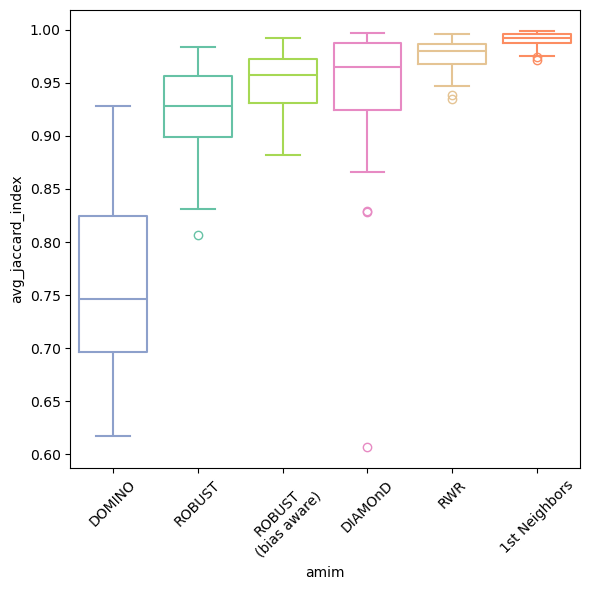

In [50]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=summary_df, y="avg_jaccard_index", hue="amim", x="amim", fill=False, palette=dict(zip(amim_meta_df.label, amim_meta_df.color)), order=amim_meta_df.label)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


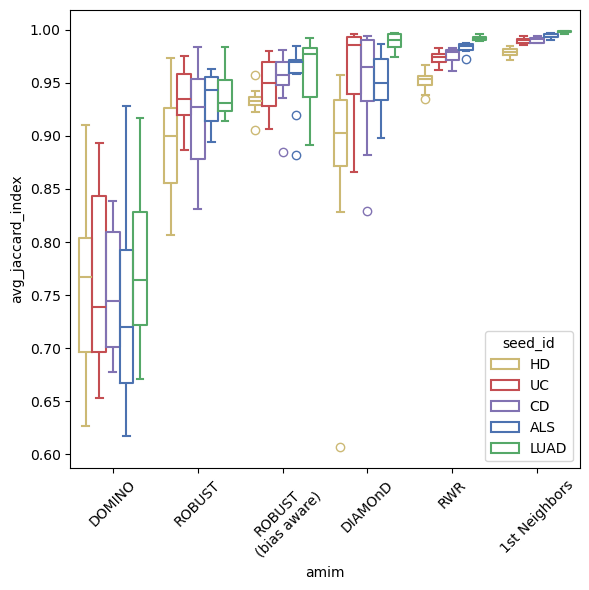

In [51]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=summary_df, y="avg_jaccard_index", hue="seed_id", x="amim", fill=False, palette=dict(zip(seed_meta_df.short, seed_meta_df.color)), order=amim_meta_df.label, hue_order=seed_meta_df.short)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

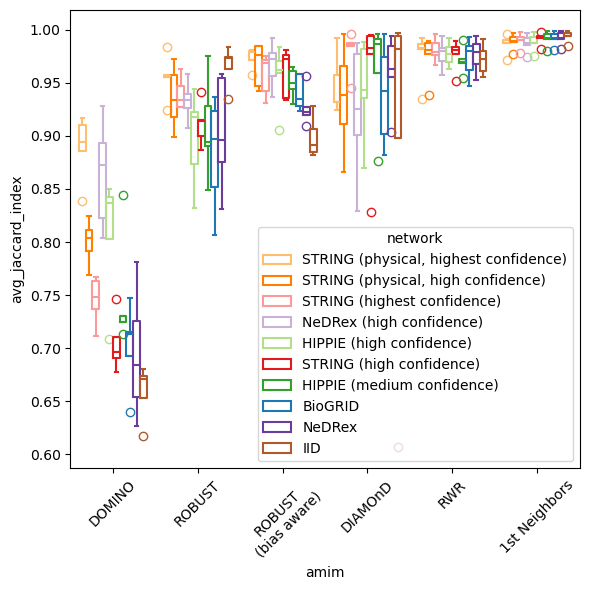

In [52]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=summary_df, y="avg_jaccard_index", hue="network", x="amim", fill=False, palette=dict(zip(network_meta_df.label, network_meta_df.color)), order=amim_meta_df.label, hue_order=network_meta_df.label)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Seed rediscovery rate

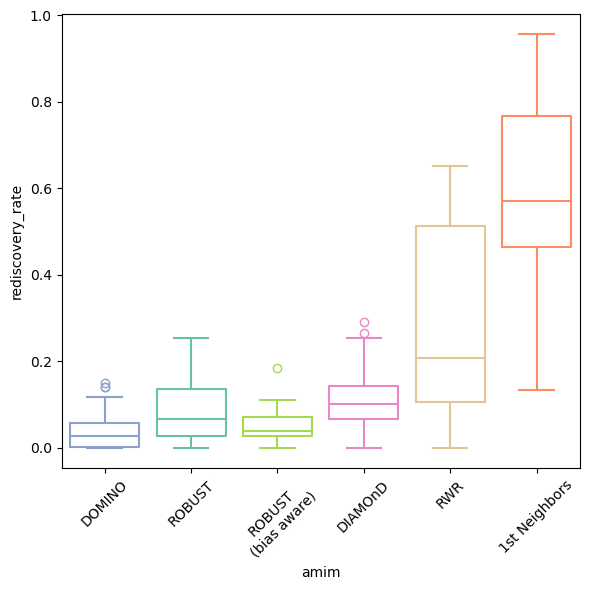

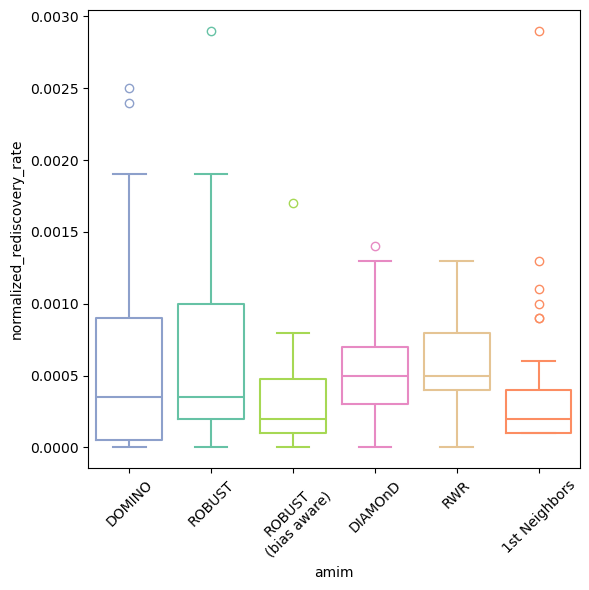

In [53]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=summary_df, y="rediscovery_rate", hue="amim", x="amim", fill=False, palette=dict(zip(amim_meta_df.label, amim_meta_df.color)), order=amim_meta_df.label)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
sns.boxplot(data=summary_df, y="normalized_rediscovery_rate", hue="amim", x="amim", fill=False, palette=dict(zip(amim_meta_df.label, amim_meta_df.color)), order=amim_meta_df.label)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

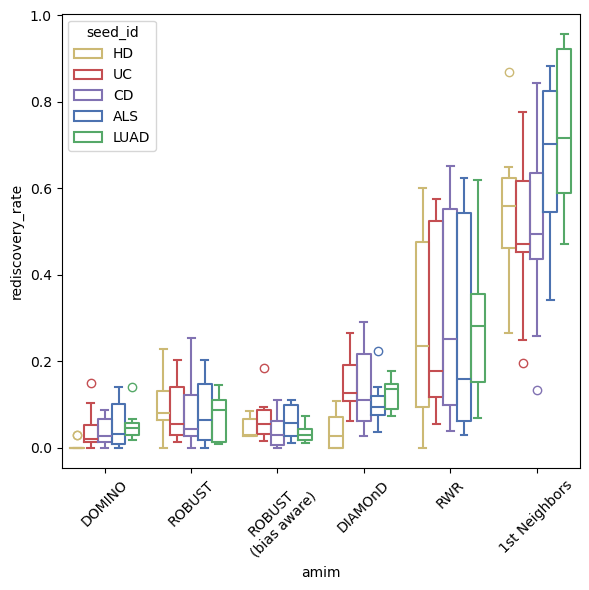

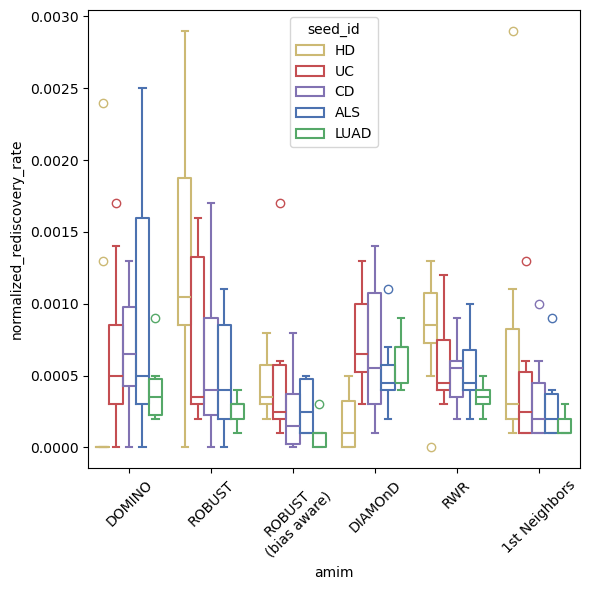

In [54]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=summary_df, y="rediscovery_rate", hue="seed_id", x="amim", fill=False, palette=dict(zip(seed_meta_df.short, seed_meta_df.color)), order=amim_meta_df.label, hue_order=seed_meta_df.short)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
sns.boxplot(data=summary_df, y="normalized_rediscovery_rate", hue="seed_id", x="amim", fill=False, palette=dict(zip(seed_meta_df.short, seed_meta_df.color)), order=amim_meta_df.label, hue_order=seed_meta_df.short)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

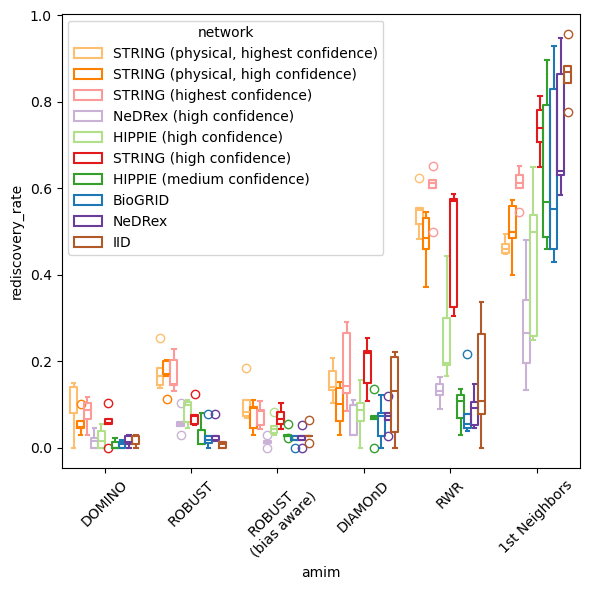

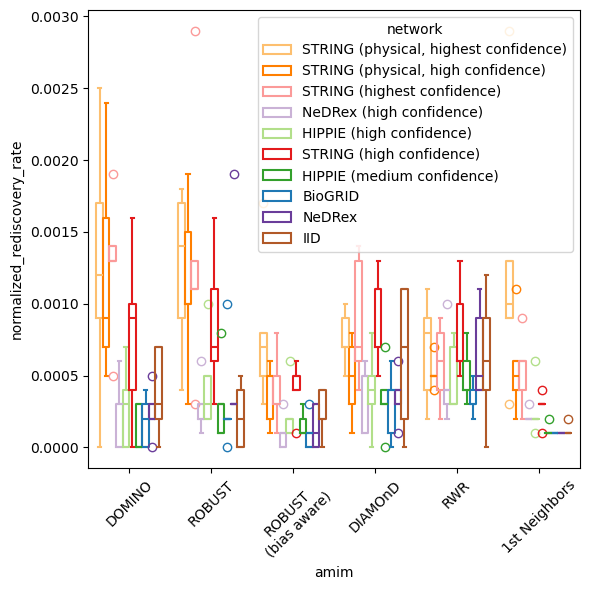

In [55]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=summary_df, y="rediscovery_rate", hue="network", x="amim", fill=False, palette=dict(zip(network_meta_df.label, network_meta_df.color)), order=amim_meta_df.label, hue_order=network_meta_df.label)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
sns.boxplot(data=summary_df, y="normalized_rediscovery_rate", hue="network", x="amim", fill=False, palette=dict(zip(network_meta_df.label, network_meta_df.color)), order=amim_meta_df.label, hue_order=network_meta_df.label)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()